# Phase

In [1]:
%run ../setup.ipynb

The examples we've seen so far have all used cosine waves, but what if we had used a sine wave instead of a cosine for our signal $x$?

Continuing the example in the previous section, we'll use $m=3$ to generate a sine wave at an analysis frequency with $f_s=20$ and $N=40$:

```{math}

\color{#0271AE}{x[n]} = \sin\left(2\pi \cdot \frac{3}{40} \cdot n \right).
```

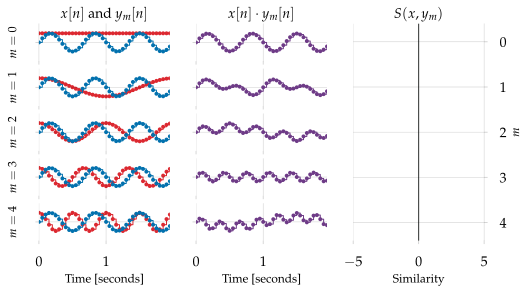

In [2]:
# Do the cosine transform
from matplotlib import gridspec

fig = plt.figure(figsize=figaspect(0.5))

M = 5

gs = gridspec.GridSpec(M, 3)

fs = 20
N = 40
t = np.arange(N) / fs
f0 = 1.5
x = np.sin(2 * np.pi * f0 * t)

xfft = np.fft.rfft(x).real

sharing = None
for i in range(M):
    ax1 = plt.subplot(gs[i, 0], sharex=sharing, sharey=sharing)
    
    ref = np.cos(2 * np.pi * i / N * fs * t)

    ax1.step(t, x, zorder=2, marker='.', where='post', linewidth=1)
    ax1.step(t, ref, zorder=-1, marker='.', where='post', linewidth=1)
    ax1.set_ylim([-2.05, 2.05])
    ax1.set_yticks([0])
    ax1.set_yticklabels([])
    ax1.set_ylabel('$m={:d}$'.format(i))
    ax1.label_outer();

    xsim = x * ref
    
    ax2 = plt.subplot(gs[i, 1], sharex=sharing, sharey=sharing)
    ax2.step(t, xsim, color=colors[4], label=r'$x[n] \cdot y_m[n]$', marker='.', where='post', linewidth=1)
    ax2.set_yticks([0])
    ax2.set_ylim([-2.1, 2.1])
    ax2.label_outer();
    
    if i == 0:
        ax1.set_title('$x[n]$ and $y_m[n]$')
        ax2.set_title(r'$x[n] \cdot y_m[n]$')
    elif i == M - 1:
        ax1.set_xlabel('Time [seconds]')
        ax2.set_xlabel('Time [seconds]')
        
ax = plt.subplot(gs[:, 2])
ax.barh(np.arange(M), xfft[:M], color=colors[4])
ax.invert_yaxis();
ax.axvline(0, color=colors[3], zorder=-1, linewidth=1)
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.set(title=r'$S(x, y_m)$', ylabel=r'$m$', yticks=range(M), xlim=[-5, 5], ylim=[M - 1 + .4, -0.4], xlabel='Similarity');
glue('sine-analysis-example', fig, display=False)

```{glue:figure} sine-analysis-example
---
name: sine-analysis-example
---

A sine wave $x[n]$ at an analysis frequency results in similarities $S=0$ for all reference signals!
```

{numref}`sine-analysis-example` is not an error --- all similarity scores here are 0, **including** the comparison to $m=3$!

To make sense of this, we'll first convert the $\sin$ wave into a standard cosine form by using Equation {eq}`wave-convert`:

```{math}

\begin{align*}
x[n] &= \sin\left(2\pi \cdot \frac{3}{N} \cdot n\right) & \text{by definition of } x\\
&= \cos\left(\frac{\pi}{2} - 2\pi \cdot \frac{3}{N} \cdot n\right) & \text{by the conversion rule}\\
&= \cos\left(2\pi \cdot \frac{3}{N} \cdot n - \frac{\pi}{2}\right) & \cos(\theta) = \cos(-\theta).
\end{align*}
```

Now that we have $x$ in cosine form, we can apply the reasoning from above to calculate each similarity score:

```{math}

\begin{align*}
S(x, y_m) &= \sum_{n=0}^{N-1} {\color{#0271AE} \cos\left(2\pi \cdot \frac{3}{N} \cdot n - \frac{\pi}{2}\right)} \cdot 
{\color{#DC2830} \cos \left(2\pi\cdot\frac{m}{N} \cdot n \right)}\\
&= \frac{1}{2} \sum_{n=0}^{N-1} \left( {\color{#0271AE} \cos\left(2\pi \cdot \frac{3 + m}{N} \cdot n - \frac{\pi}{2}\right)} + 
{\color{#DC2830} \cos \left(2\pi\cdot\frac{3-m}{N} \cdot n - \frac{\pi}{2}\right)} \right)
\end{align*}
```

This looks almost identical to our first example, except that we now have phase offsets of $-\pi/2$ in both terms of the summation.
If $m \neq 3$, this phase difference will not matter: summing over all samples $n=0\dots N-1$ will still produce a total of 0.

However, if $m=3$, the first term (${\color{#0271AE}3+m}$) will again cancel to 0 when summed, but the second term (${\color{#DC2830}3-m=0}$) will simplify to

```{math}

{\color{#DC2830} \cos\left(2\pi \cdot \frac{0}{N}\cdot n - \frac{\pi}{2} \right)} 
= \cos\left(-\frac{\pi}{2} \right)
= \cos\left(\frac{\pi}{2} \right) = 0. 
```

So, rather than getting a contribution of $\cos(0) = 1$ for each term in the summation like our first example, we instead get a contribution of 0, and the total summation results in $S=0$.

**This is a huge problem!**

Remember that our goal is to represent the frequency content of a signal $x$ by comparing it against a collection of reference signals of known frequencies.
But what we've just shown is that a signal can have exactly the same frequency as one of our reference signals, **and still produce a score of 0!**

This example of a sine wave is in some ways the worst-case scenario.
In a bit more generality, we can consider a signal $x$ with an analysis frequency index $m \neq 0$ and arbitrary phase offset $\phi$:

```{math}
x[n] = \cos\left(2\pi \cdot \frac{m}{N} \cdot n + \phi\right)
```

and by substituting $\phi$ for $-\pi/2$ in the above derivation, we generally have

```{math}
:label: phase-similarity

S(x, y_m) = 
\begin{cases}
\frac{N}{2} \cdot \cos\phi &\text{if } m \neq  \frac{N}{2}\\
N \cdot \cos\phi & \text{if } m = \frac{N}{2}.
\end{cases}
```

In [ ]:
from matplotlib import gridspec

fs = 20
N = 40
t = np.arange(N) / fs
f0 = 1.5
x = np.cos(2 * np.pi * f0 * t)

# Time sample positions
y = np.cos(2 * np.pi * f0 * t)

# filter coefficients
xy = x * y

pxsum = np.cumsum(xy)

# Set up the plot skeleton
fig = plt.figure(figsize=figaspect(4./5))

legs = []

gs = gridspec.GridSpec(3, 3)

ax1 = plt.subplot(gs[0:1, 0:2])
# This is the input data
p_x = ax1.step(t, x, label=r'$x[n],\, \phi=0$', where='post', marker='.', zorder=2)[0]

legs.append(ax1.legend(ncol=2, loc='lower left', labelcolor='markerfacecolor'))
ax1.label_outer()

ax2 = plt.subplot(gs[1:2, 0:2], sharex=ax1, sharey=ax1)

p_y = ax2.step(t, y, label=r'$y[n]$',where='post', marker='.', color=colors[1], zorder=2)[0]

# And a label that will change

ax2.legend(ncol=2, loc='lower left', labelcolor='markerfacecolor')
ax2.label_outer()


ax3 = plt.subplot(gs[2:3, 0:2], sharex=ax1, sharey=ax1)

p_xy = ax3.step(t, xy, where='post', marker='.', label=r'$x[n] \cdot y[n]$',
                   color=colors[4], zorder=1)[0]

k = 0

ax3.set_xlabel('Time [seconds]')
ax3.label_outer()
ax3.legend(loc='lower left', labelcolor='markerfacecolor')
ax3.set_ylim([-1.1, 1.1])

ax4 = plt.subplot(gs[:, 2])
p_S = ax4.bar(np.arange(1), [0], color=colors[4], label='$S$', alpha=0.75,
                linewidth=2, edgecolor=colors[4])
ax4.xaxis.set(ticks=[])
ax4.yaxis.tick_right()
ax4.set_ylim([-N//2, N//2])
ax4.set_xlim([-1, 1])

legs.append(ax4.legend(loc='lower left'))

##--
## Animation code
# Animation frame rate
frame_rate = 24
anim_speed = 4

n_frames = int(30 * frame_rate / anim_speed)

phi = np.linspace(0, 2 * np.pi, num=n_frames)

def init():
    return tuple([p_x, p_xy] + legs + list(p_S))
        
# This is all badly broken
def animate(n):
    x = np.cos(2 * np.pi * f0 * t + phi[n])
    p_x.set_data(t, x)
    p_xy.set_data(t, x * y)
    score = x.dot(y)
    for _, b in enumerate(p_S):
        b.set_height(score)

    p_x.set_label('$x[n],\,\\phi={:.02f}$ rad'.format(phi[n]))
    legs[0].texts[0].set_text(p_x.get_label())
    p_S.set_label('$S={:.02f}$'.format(score))
    legs[1].texts[0].set_text(p_S.get_label())
    return tuple([p_x, p_xy] + legs + list(p_S))

animation = FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(n_frames),
                               interval=1000./frame_rate, blit=True,
                               repeat_delay=1000);

glue('wave-similarity', animation, display=False)

In [4]:
animation

```{glue:figure} wave-similarity

$x$ (top) is a sinusoid of the same analysis frequency as the reference signal $y$ (middle), but with varying phase $\phi$.
As $\phi$ varies, the sample-wise product changes (bottom), as does the total score $S$ (right).
```

## Summary

By now, we've seen a few interesting quirks of that arise when we compare sinusoids.
To quickly recap:

1. If $x$ is **cosine wave** at an analysis frequency, it will have non-zero similarity only for reference signal of the same frequency.
2. If $x$ is a cosine wave at a **non-analysis** frequency, it will have non-zero similarity to all reference signals.
3. If $x$ is a **sine wave** at an analysis frequency, it will have zero similarity even the reference signal of the same frequency.
4. If $x$ is a sinusoid of arbitrary phase at an analysis frequency, its similarity scores will generally depend on its phase.

In the next section, we'll see how to resolve the phase issue to provide a more robust representation: *the Fourier transform*!